In [71]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

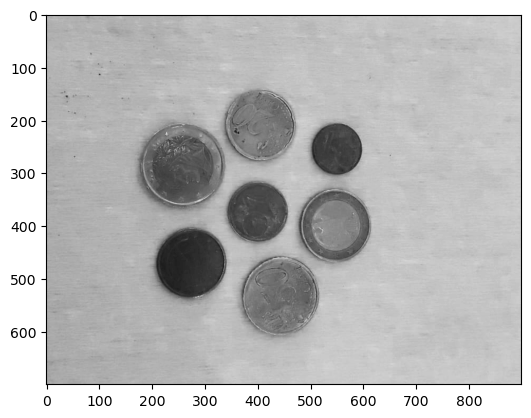

In [72]:
src_monedas_orig = cv.imread("monedas.jpg")
src_monedas_orig = src_monedas_orig[500:1200]
src_monedas = src_monedas_orig[:, :, 0]

plt.imshow(src_monedas,cmap="gray")

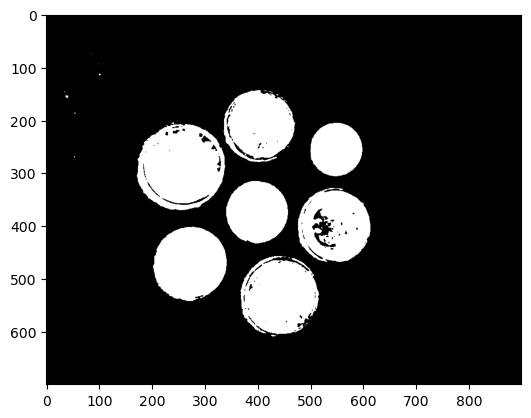

In [73]:
kernel = np.ones((5,5),np.uint8)
src_monedas_dif = cv.GaussianBlur(src=src_monedas, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_monedas_dif,127,255,cv.THRESH_BINARY_INV)

plt.imshow(src_monedas_binary,cmap="gray")

Text(0.5, 1.0, 'Clean')

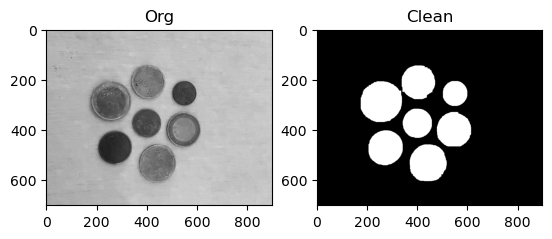

In [74]:
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=3)

# kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=4)

# src_monedas_clean = cv.erode(src_monedas_clean,kernel,iterations=1)

fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(src_monedas,cmap="gray")
ax1.set_title("Org")
ax2.imshow(src_monedas_clean,cmap="gray")
ax2.set_title("Clean")

Text(0.5, 1.0, 'Clean')

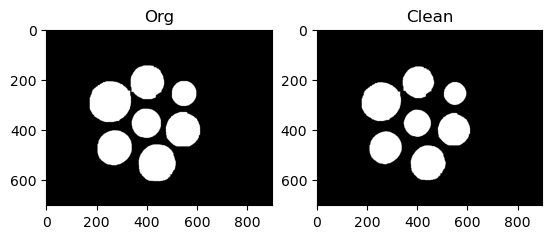

In [75]:
mascara = cv.erode(src_monedas_clean,kernel,iterations=2)

fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(src_monedas_clean,cmap="gray")
ax1.set_title("Org")
ax2.imshow(mascara,cmap="gray")
ax2.set_title("Clean")

### Obtencion del contorno
Una vez obtenida la mascara, pasaremos a sacar el contorno de las monedas

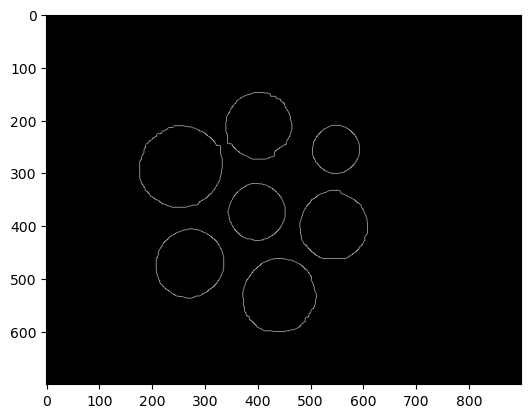

In [76]:
ret, th = cv.threshold(mascara.copy(),127,255,0)
umbral_minimo = 50
umbral_maximo = 100
cn = cv.Canny(th,umbral_minimo,umbral_maximo)
plt.imshow(cn,cmap="gray")

7
Centro: 440, 532
Área: 15132.5  Perímetro: 470.2325350046158
Centro: 271, 471
Área: 13002.0  Perímetro: 431.3036040067673
Centro: 543, 400
Área: 12916.5  Perímetro: 430.2325347661972
Centro: 398, 374
Área: 8971.5  Perímetro: 356.4335459470749
Centro: 254, 288
Área: 18934.5  Perímetro: 523.3452347517014
Centro: 548, 255
Área: 6312.5  Perímetro: 297.32084906101227
Centro: 401, 210
Área: 12206.5  Perímetro: 428.7766922712326


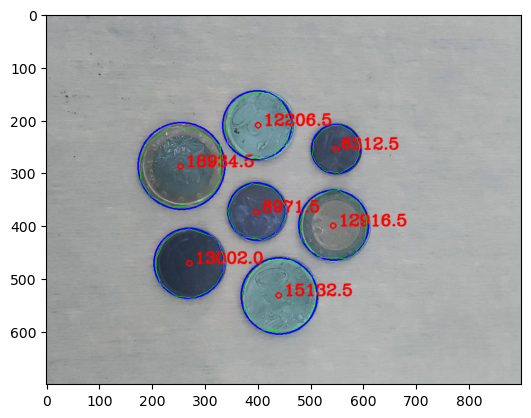

In [77]:

approx=[]
contornos, jerarquia = cv.findContours(cn.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
#Recorremos todos los contornos
for cont in contornos:
  #Obtener los datos de cada contorno
  M = cv.moments(cont)
  #Si es distinto de cero para saber si existe
  if M['m00'] != 0:
    cx = int(M["m10"]/M['m00'])
    cy = int(M["m01"]/M['m00'])
    print(f"Centro: {cx}, {cy}")
    #Pintamos un circulo dentro en el centro del contorno
    cv.circle(src_monedas_orig, (cx, cy), 5, (255, 0, 0), 2)

  area = cv.contourArea(cont)
  #Calcular el perimetro
  perimetro = cv.arcLength(cont, True)
  print(f"Área: {area}  Perímetro: {perimetro}")
  #Obtenemos los datos para hacer un circulo rodeando el contorino. 
  #Como el contorno es otra circunferencia, nos va a quedar una circunferencia mas clara y marcada
  (x,y),radius = cv.minEnclosingCircle(cont)
  cv.circle(src_monedas_orig,(int(x),int(y)),int(radius), (0,0,255),2)
  #Colocar el texto
  cv.putText(src_monedas_orig,f'{area}',(cx+10, cy),cv.FONT_HERSHEY_COMPLEX,1,(255,0,0),2,cv.LINE_AA)  #Colcular el area 
  approx.append(cv.approxPolyDP(cont,0.01*perimetro,True))

cv.drawContours(src_monedas_orig, approx, -1, (0,255,0), 1)
plt.imshow(src_monedas_orig)